In [85]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# 1. Overviewing of the dataset
# Displaying first few rows
df.head()

,artist,title,label,country,format,release_date,genre,styles,have,want,num_ratings,average_rating,lowest_price,median_price,highest_price
0,Titiyo,My Body Says Yes,Arista,UK,Vinyl,1991,Electronic,House,136,30,11,"4,36",NaN,NaN,NaN
1,North By North West (2),Spirit,Black Sunshine Records,UK,Vinyl,1996,Electronic,House,46,37,3,"3,67",NaN,NaN,7.0
2,Ruby Turner,Never Gonna Give You Up,Wired Recordings,UK,Vinyl,1994,Electronic,House,200,117,22,"4,27",NaN,10.0,NaN
3,Shape Navigator,Summer's Promise,Guerilla,UK,Vinyl,1994,Electronic,House,82,43,8,"3,13",NaN,NaN,NaN
4,Mode 4 (2),Kuntas Dream,Spidercom,UK,Vinyl,1990,Electronic,House,36,55,4,"2,5",NaN,NaN,NaN


In [109]:
# Checking basic info on columns, data types, and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34923 entries, 0 to 34922
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   artist          34923 non-null  object 
 1   title           34923 non-null  object 
 2   label           34923 non-null  object 
 3   country         34923 non-null  object 
 4   format          34923 non-null  object 
 5   release_date    34923 non-null  int64  
 6   genre           34923 non-null  object 
 7   styles          33461 non-null  object 
 8   have            34923 non-null  int64  
 9   want            34923 non-null  int64  
 10  num_ratings     34923 non-null  int64  
 11  average_rating  33970 non-null  object 
 12  lowest_price    2795 non-null   float64
 13  median_price    2252 non-null   float64
 14  highest_price   4233 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 4.0+ MB


In [110]:
# Summaring statistics for numerical columns
df.describe()

,release_date,have,want,num_ratings,lowest_price,median_price,highest_price
count,34923.000000,34923.000000,34923.000000,34923.000000,2795.000000,2252.000000,4233.000000
mean,1995.508175,216.222633,155.975002,32.956934,4.136315,7.467140,21.189227
std,3.034915,334.549660,266.956669,55.145888,6.467945,12.484243,28.705439
min,1990.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1993.000000,48.500000,28.000000,6.000000,1.000000,2.000000,7.000000
50%,1996.000000,116.000000,67.000000,16.000000,2.000000,3.000000,12.000000
75%,1998.000000,254.000000,172.500000,39.000000,5.000000,8.000000,25.000000
max,2000.000000,10643.000000,7699.000000,1771.000000,150.000000,275.000000,550.000000


In [111]:
# 2. Checking for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 styles             1462
average_rating      953
lowest_price      32128
median_price      32671
highest_price     30690
dtype: int64


In [112]:
# 3. Distribution of categorical columns
# Displaying the count of unique values in 'country' and 'styles' only, as 'genre' and 'format' are single-value columns
print("Unique countries:", df['country'].nunique())
print("Unique styles:", df['styles'].nunique())

Unique countries: 57
Unique styles: 6367


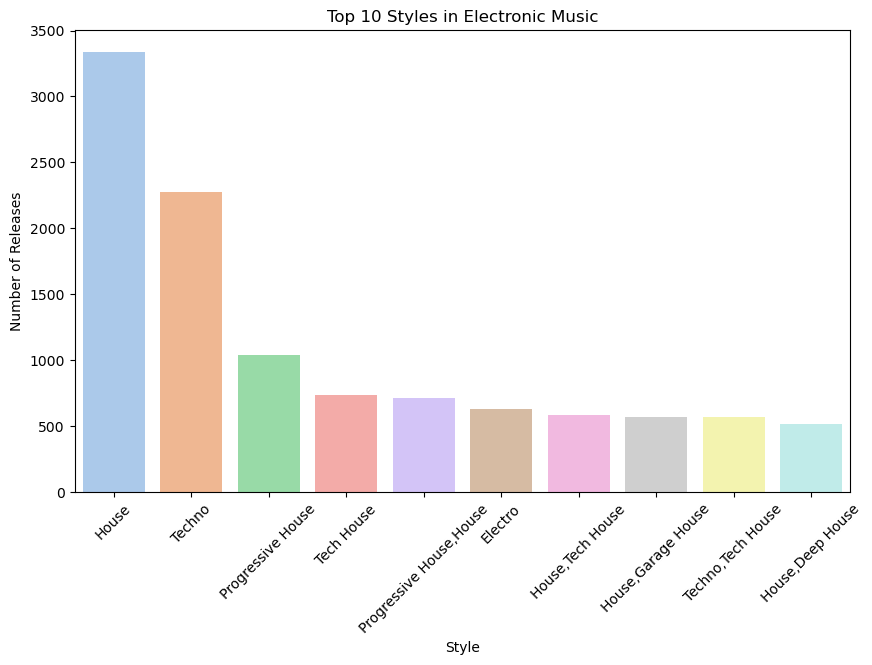

In [113]:
# Top 10 styles in Electronic Music
plt.figure(figsize=(10, 6))
top_styles = df['styles'].value_counts().head(10)
sns.barplot(x=top_styles.index, y=top_styles.values, palette="pastel")
plt.title("Top 10 Styles in Electronic Music")
plt.xlabel("Style")
plt.ylabel("Number of Releases")
plt.xticks(rotation=45)
plt.show()

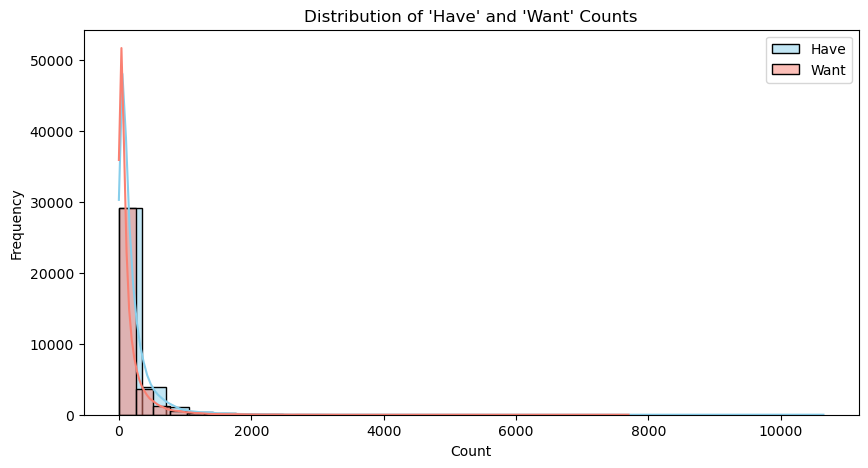

In [114]:
# 4. Numerical distribution (e.g., 'have', 'want', 'num_ratings')
# Histogram for 'have' and 'want' columns
plt.figure(figsize=(10, 5))
sns.histplot(df['have'], bins=30, kde=True, color='skyblue', label='Have')
sns.histplot(df['want'], bins=30, kde=True, color='salmon', label='Want')
plt.legend()
plt.title("Distribution of 'Have' and 'Want' Counts")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

In [115]:
# 5. Box plot for price columns (lowest_price, median_price, highest_price)
# Selecting the price columns and convert them to numeric values (coerce errors to NaN)
price_columns = ['lowest_price', 'median_price', 'highest_price']
for col in price_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric and coerce errors to NaN

# Removing rows with NaN in the price columns
df_prices = df[price_columns].dropna()


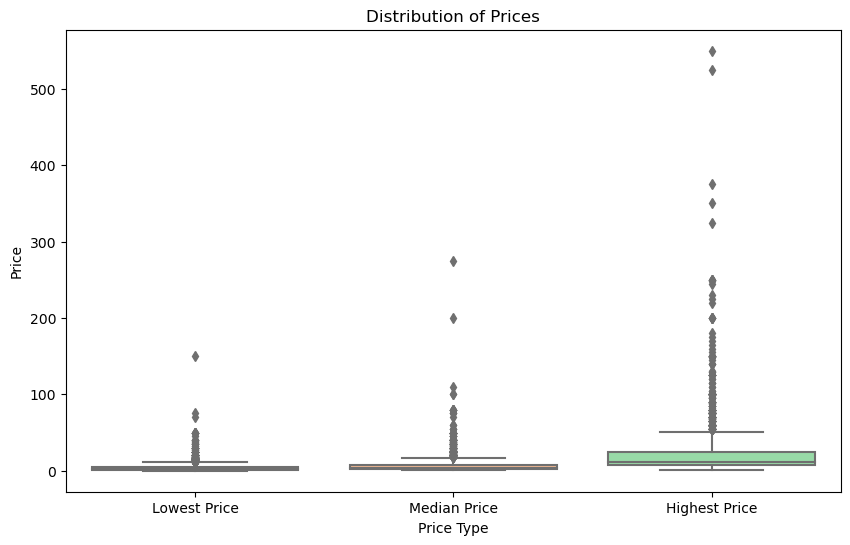

In [116]:
# This visualizes the spread and outliers in each price column
price_columns = ['lowest_price', 'median_price', 'highest_price']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[price_columns], palette='pastel')
plt.title("Distribution of Prices")
plt.xlabel("Price Type")
plt.ylabel("Price")
plt.xticks(ticks=[0, 1, 2], labels=['Lowest Price', 'Median Price', 'Highest Price'])
plt.show()

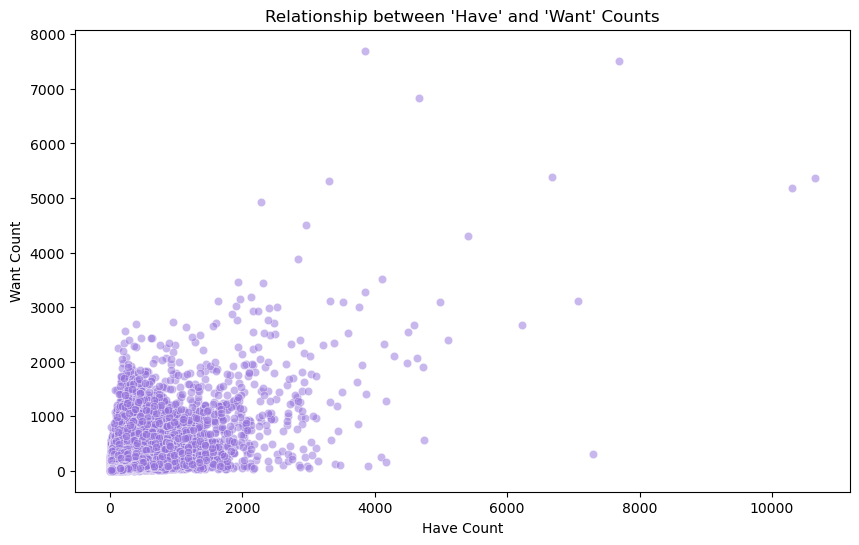

In [117]:
# 6. Scattering plot to visualize correlation between 'have' and 'want' counts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='have', y='want', data=df, alpha=0.5, color='mediumpurple')
plt.title("Relationship between 'Have' and 'Want' Counts")
plt.xlabel("Have Count")
plt.ylabel("Want Count")
plt.show()